In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: /Users/melodi/sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *
from src.generate_images import *

In [4]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [5]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [6]:
print('Number of categories: %d' % len(categories))

Number of categories: 345


In [6]:
list(categories.keys())[:10]

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm']

In [6]:
category = input("Selected category from the list above: ") or 'cat'
# Checking to see if the entered category is in the categories dictionary
assert categories.get(category)

Selected category from the list above: 


In [7]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, category)

Creating directories to save images, weights and the model ...
folders are created...


In [8]:
option = input("Select a download method ... \n 1. Use Google Cloud credentials stored in a json file \n 2. Use gsutil in the notebook \n 3. Use gsutil in the terminal \n")

Select a download method ... 
 1. Use Google Cloud credentials stored in a json file 
 2. Use gsutil in the notebook 
 3. Use gsutil in the terminal 
6


In [11]:
if option == "1":
    download_data(src_list, dst_list)
elif option == "2":
    for (src_file, dst_file) in zip(src_list, dst_list): 
        print('gs://quickdraw_dataset/' + src_file, dst_file)
        !gsutil -m cp {'gs://quickdraw_dataset/' + src_file} {dst_file}
elif option == "3":
    print('Type the following in the terminal to download the files manually:')
    for (src_file, dst_file) in zip(src_list, dst_list):
        print("gsutil -m cp " + "gs://quickdraw_dataset/" + "{}".format(src_file) + " " + "{}".format(dst_file))

Type the following in the terminal to download the files manually:
gsutil -m cp gs://quickdraw_dataset/full/numpy_bitmap/cat.npy C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\cat\cat.npy
gsutil -m cp gs://quickdraw_dataset/full/raw/cat.ndjson C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\cat\cat.ndjson


In [8]:
model_path = os.path.join(paths_dict['input_path'], category, category)

In [9]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

In [17]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [10]:
def plot_bitmap(index):
    print("Bitmap image:")
    plt.imshow(npy_data[index].reshape(28,28))

In [18]:
def plot_raw(index):
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[index]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  123203  images in selected category cat
Select an index value from 0 to 98561 to display and compare bitmap and raw images:1300
Selected index: 1300
Bitmap image:


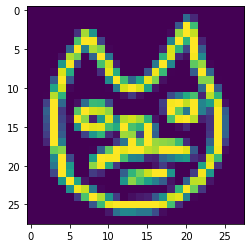

Raw image:
There are 9 number of strokes in this raw image file!


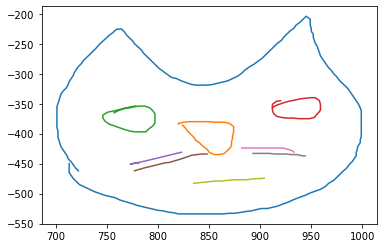

In [93]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
index=int(input("Select an index value from 0 to " + str((len(npy_data)*8)//10) + " to display and compare bitmap and raw images:"))
print("Selected index: {}".format(index))
plot_bitmap(index)
plt.show()
plot_raw(index)

In [14]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [45]:
DRAW(model_path, category)

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [15]:
train_data = Dataset(x_train)
test_data = Dataset(x_test)

In [97]:
model = DRAW(category)

In [ ]:
# TRAINING AND TESTING
print("training...")
model.start(phase='train') 

## Generating Images

In [22]:
index = 68

Bitmap image:


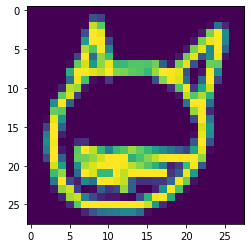

In [23]:
plot_bitmap(index)

reconstructing images...


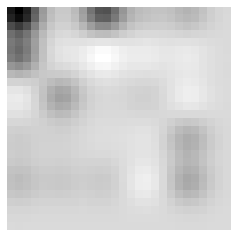

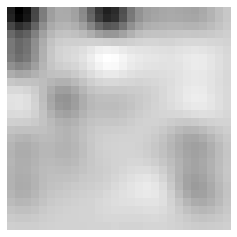

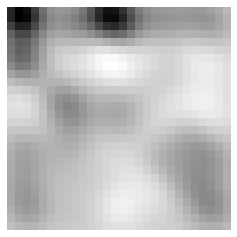

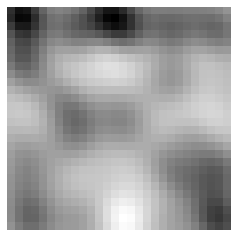

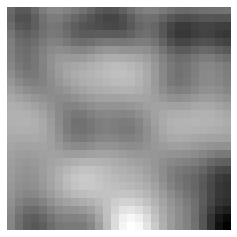

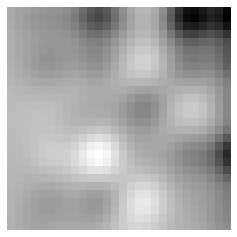

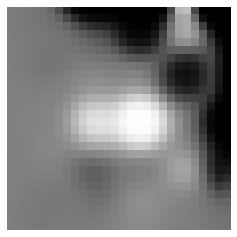

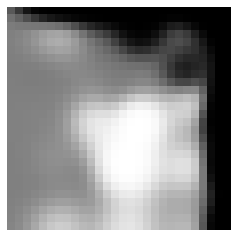

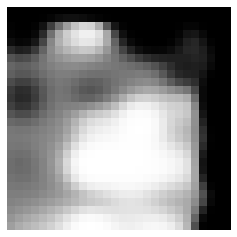

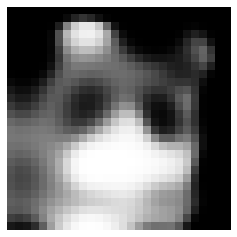

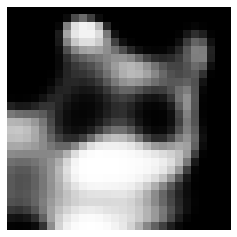

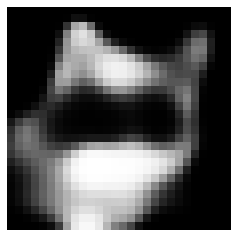

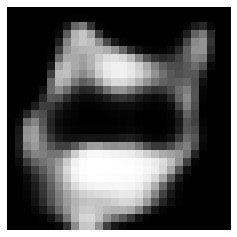

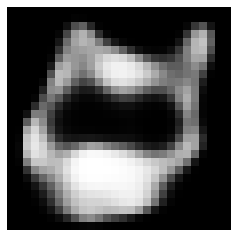

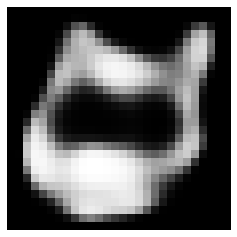

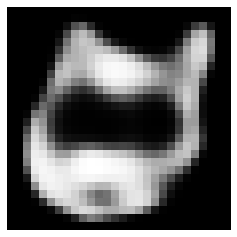

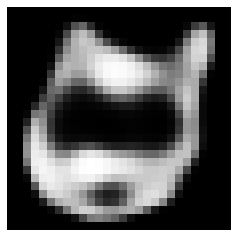

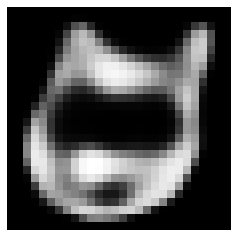

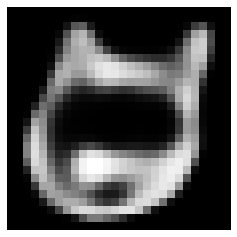

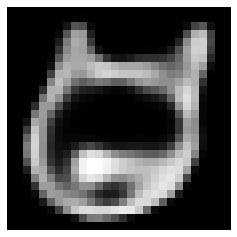

In [24]:
print("reconstructing images...")
test_model = Test(category)
test_model.xrecons(index)

reconstructing batch...


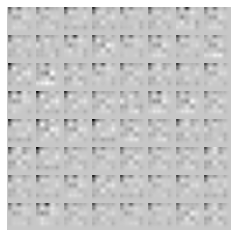

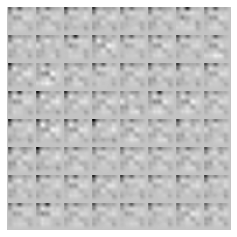

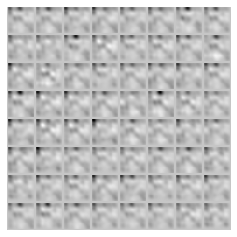

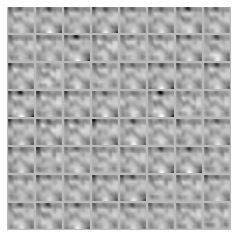

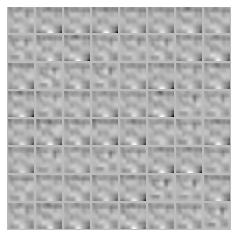

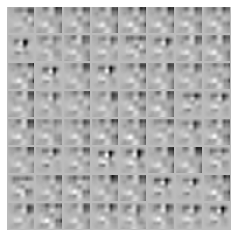

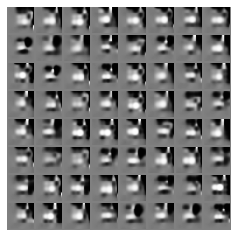

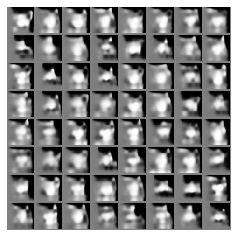

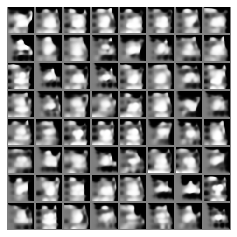

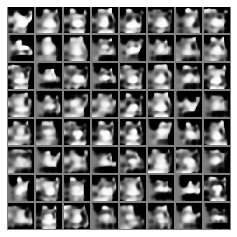

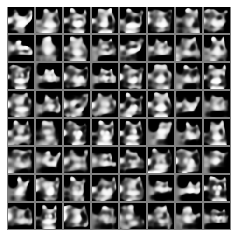

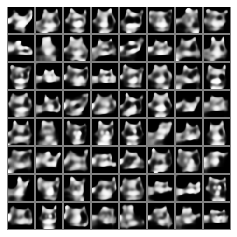

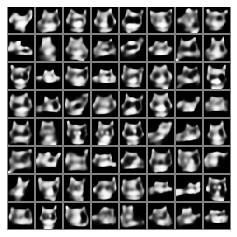

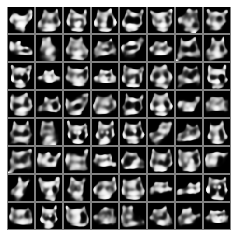

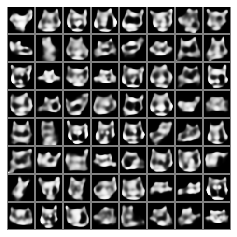

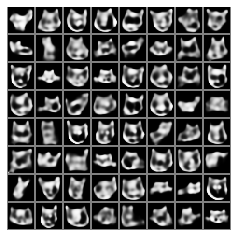

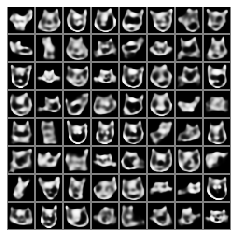

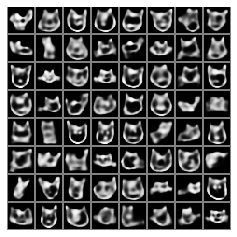

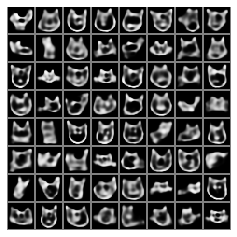

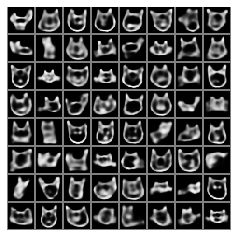

In [25]:
print("reconstructing batch...")
test_model = Test(category)
test_model.xrecons_grid(batch=2)

Select an index value from 0 to 24641  to display and compare bitmap and raw images:2
Bitmap image:


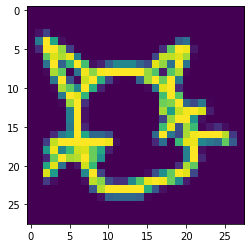

Raw image:
There are 7 number of strokes in this raw image file!


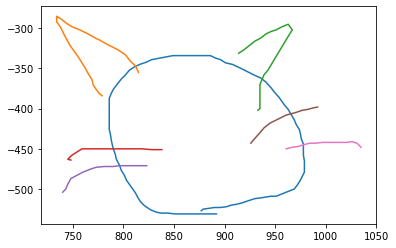

In [19]:
index_test = int(input("Select an index value from 0 to %d " % (len(npy_data)-len(train_data.data)) + " to display and compare bitmap and raw images:"))
index_raw = len(train_data.data) + (index_test % 64)
plot_bitmap(index_raw)
plt.show()
plot_raw(index_raw)

reconstructing images...


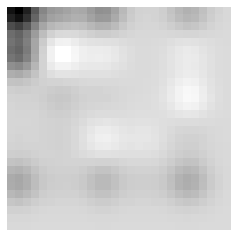

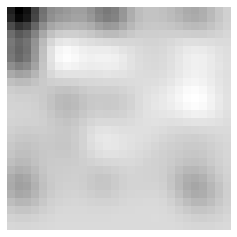

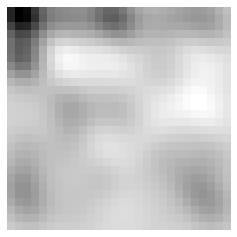

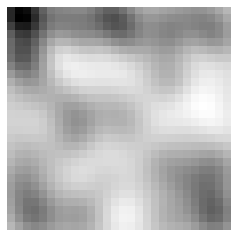

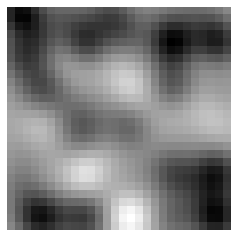

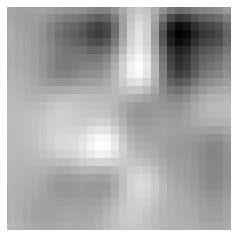

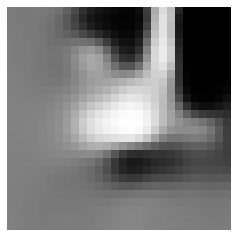

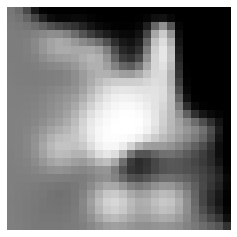

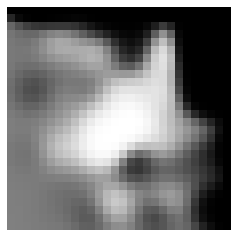

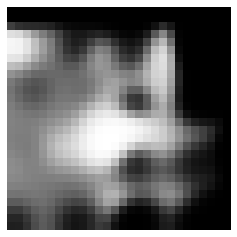

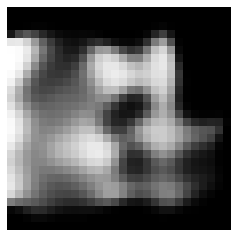

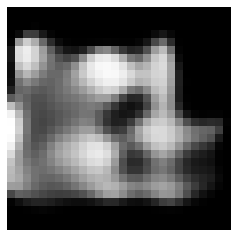

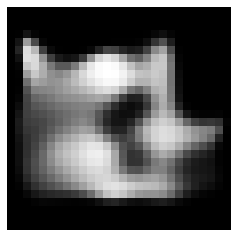

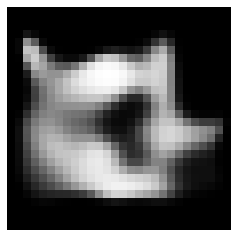

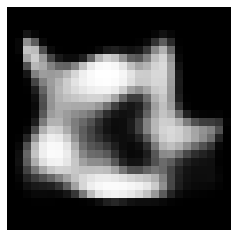

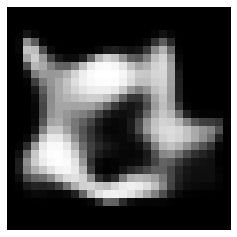

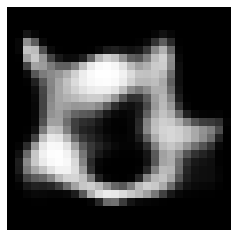

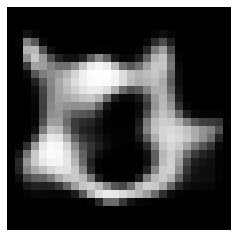

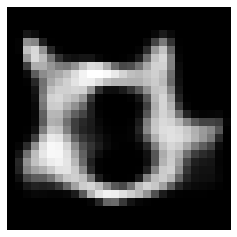

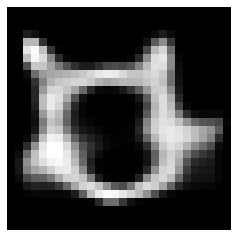

In [20]:
print("reconstructing images...")
test_model_test = Test(category)
test_model_test.xrecons(index_test, phase='test')

reconstructing images...


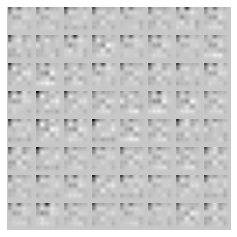

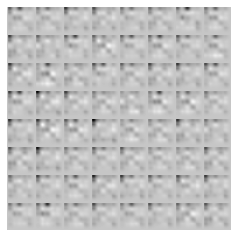

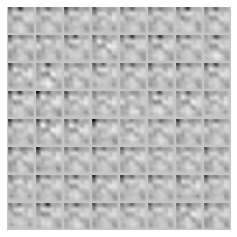

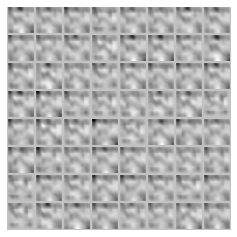

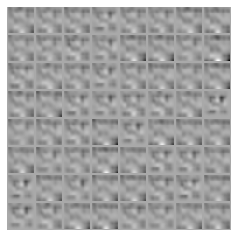

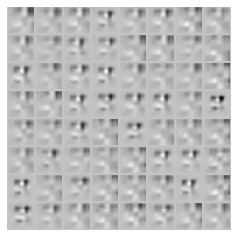

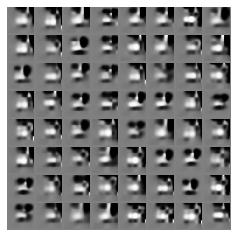

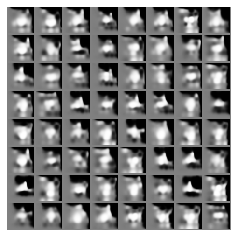

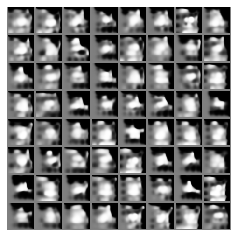

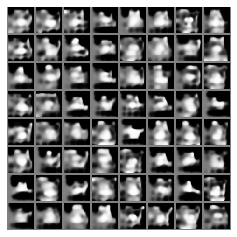

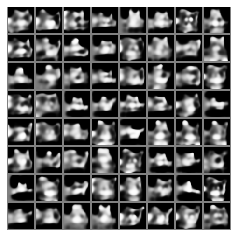

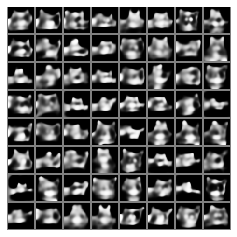

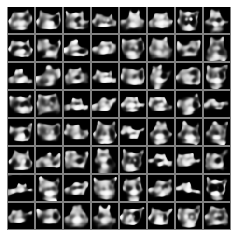

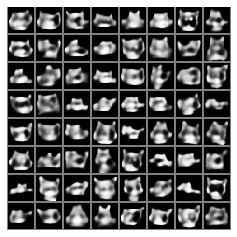

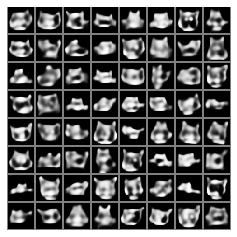

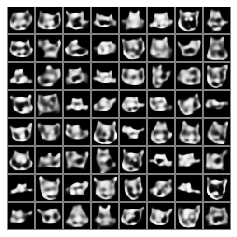

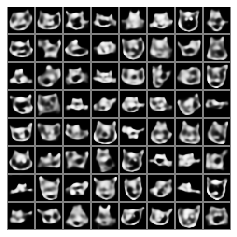

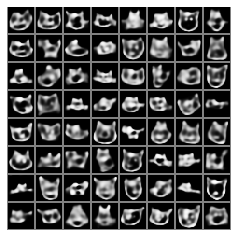

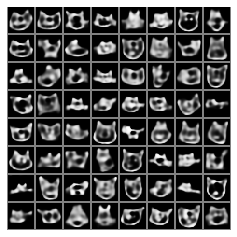

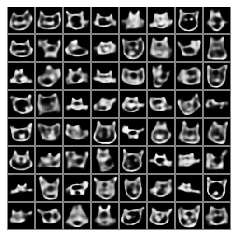

In [21]:
print("reconstructing images...")
test_model_test = Test(category)
test_model_test.xrecons_grid(batch=1, phase='test')